## 1. Prepare the Celebrity Faces Dataset
#### The dataset provides about 200,000 photographs of celebrity faces along with annotations for what appears in given photos, such as glasses, face shape, hats, hair type, etc. As part of the dataset, the authors provide a version of each photo centered on the face and cropped to the portrait with varying sizes around 150 pixels wide and 200 pixels tall. We will use this as the basis for developing our GAN model.  
#### https://www.kaggle.com/jessicali9530/celeba-dataset   (img_align_celeba.zip)

In [43]:
# sudo pip install mtcnn
import mtcnn

print(mtcnn.__version__)
# # prepare the model
# model = MTCNN()
# # detect faces in an image
# faces = model.detect_faces(pixels)
# # extract details of the face
# x1, y1, width, height = faces[0]['box']

0.0.9


In [44]:
# load an image as an rgb numpy array
def load_image(filename):
    
    # load an image from file
    image = Image.open(filename)
    # convert to rgb 
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

In [45]:
# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(128, 128)):
    
    #detect face in an image
    faces = model.detect_faces(pixels)
    # skip cases where we could not detect a face
    if len(faces) == 0:
        return None
    
    # extract face details
    x1, y1, width, height = faces[0]['box']
    
    # force detected pixel to be positive
    x1, y1 = abs(x1), abs(y1)
    # convert into coordinates
    x2, y2 = x1 + width, y1 + height
    
    # retrieve face pixels
    face_pixels = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)
    
    return face_array

In [46]:
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    
    # prepare the model
    model = MTCNN()
    faces = list()
    
    # enumarate the files
    for filename in listdir(directory):
        
        # load the image
        pixels = load_image(directory + filename)
        # get face
        face = extract_face(model, pixels)
        if face is None:
            continue
        
        # store
        faces.append(face)
        print(len(faces), face.shape)
        
        # stop once we have enough
        if len(faces) >= n_faces:
            break
            
        return asarray(faces)

In [47]:
# example of extracting and resizing faces into a new dataset
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot


# directory containing all images
directory = 'data/img_align_celeba/'
# load and extract all faces
all_faces = load_faces(directory, 50000)
print("Loaded: ", all_faces.shape)
# save in compressed format
savez_compressed('data/processed/img_align_caleba_128.npz', all_faces)

1 (128, 128, 3)
Loaded:  (1, 128, 128, 3)


Loaded:  (1, 128, 128, 3)


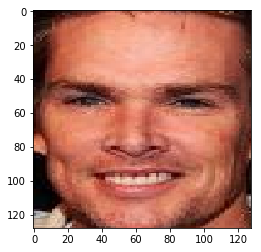

In [48]:
# load the prepared dataset
from numpy import load
# load the face dataset
data = load('data/processed/img_align_caleba_128.npz')
faces = data['arr_0']

print("Loaded: ", faces.shape)
faces[:1]
pyplot.imshow(faces[0].astype('uint8'))
pyplot.show()

Loaded:  (1, 128, 128, 3)


IndexError: index 1 is out of bounds for axis 0 with size 1

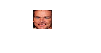

In [49]:
from numpy import load

# plot a list of loaded faces
def plot_faces(faces, n):
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, i+1)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(faces[i].astype('uint8'))
    pyplot.show()

# load the face dataset
data = load('data/processed/img_align_caleba_128.npz')
faces = data['arr_0']

print("Loaded: ", faces.shape)
plot_faces(faces, 10)

## 2. Develop Progressive Growing GAN Models